<a href="https://colab.research.google.com/github/MarcoM95/MLPNS2021/blob/main/MLPNS2021_23_03_21_ClassStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pylab as plt
from numpy import random

(array([ 3.,  4., 10., 15., 17., 22., 14.,  5.,  7.,  3.]),
 array([-2.84595514, -2.32135282, -1.79675051, -1.27214819, -0.74754588,
        -0.22294356,  0.30165875,  0.82626107,  1.35086338,  1.8754657 ,
         2.40006801]),
 <a list of 10 Patch objects>)

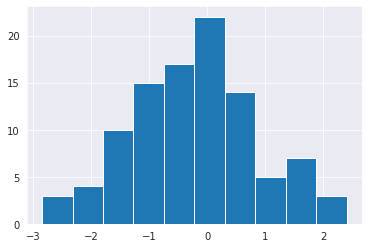

In [ ]:
plt.hist(np.random.randn(100))

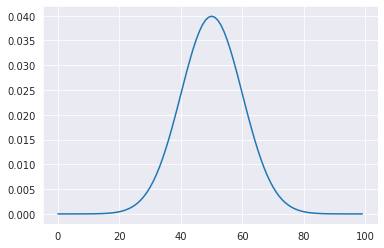

In [ ]:
def mygauss(x, mu, sig):
  return 1/np.sqrt(2*np.pi)/sig * (np.exp(-(x-mu)**2/2/sig**2))

x   = np.arange(100)
mu  = 50.
sig = 10.
mygauss(x,mu,sig);

plt.plot(x,mygauss(x,mu,sig))

In [ ]:
import scipy as sp
from scipy import stats

(array([ 2.,  2.,  9., 17., 16., 14., 11., 16.,  8.,  5.]),
 array([ 97.20141089,  97.72050633,  98.23960177,  98.75869721,
         99.27779264,  99.79688808, 100.31598352, 100.83507895,
        101.35417439, 101.87326983, 102.39236527]),
 <a list of 10 Patch objects>)

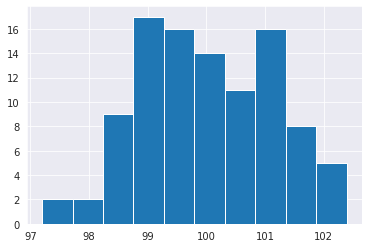

In [ ]:
np.random.seed(123)                       # fix seed
plt.hist(sp.stats.norm.rvs(100,size=100)) # Gaussian with Mean = 100

In [ ]:
np.random.seed?

In [ ]:
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence

# **Homework2**

In [ ]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
from scipy.optimize import curve_fit, minimize
    
%pylab inline
# this package sets up pretty plots
import seaborn
seaborn.set_style("darkgrid")

Populating the interactive namespace from numpy and matplotlib


##choose which distributions to use

In [ ]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']

##and which mean to give it

In [ ]:
mymean = 100

In [ ]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

##I am making a dictionary to host the distributions.
###that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful! 
###Lets start by looking at a single chi sq distribution

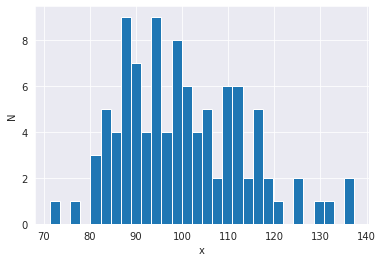

In [ ]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
np.random.seed(456)
md = {}
# md is an empty disctionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

In [ ]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))


Chisq mean: 100.09, standard deviation: 13.24


In [ ]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

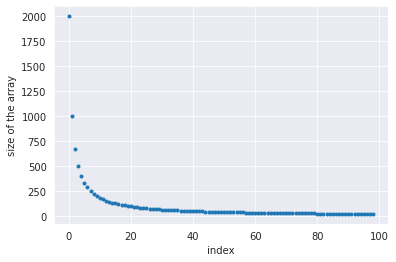

In [ ]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Text(1259.3999999999999, 100, 'expected mean')

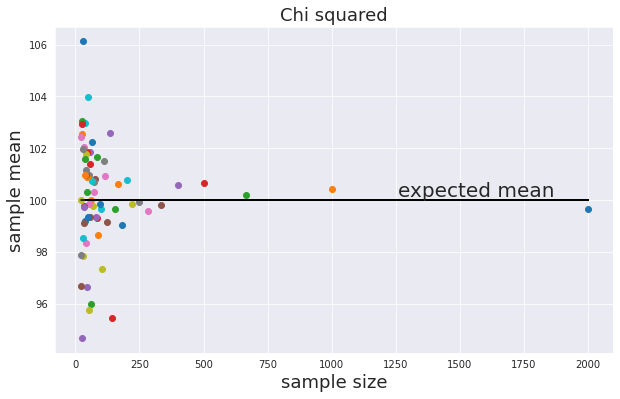

In [ ]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Text(0, 0.5, 'N')

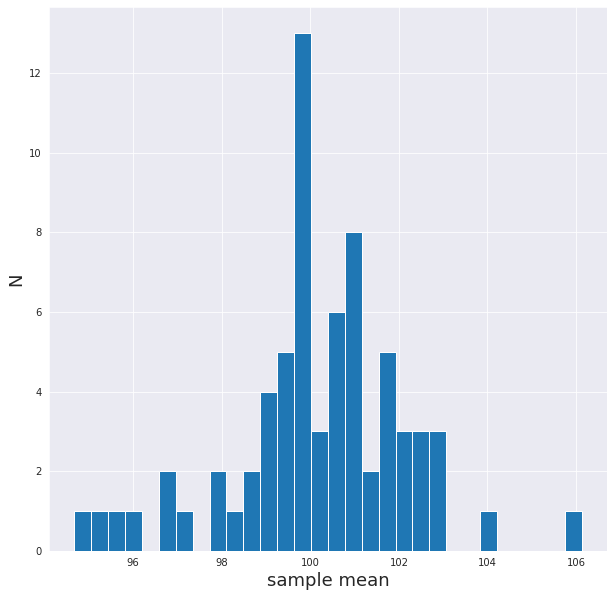

In [ ]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# **Gaussian**

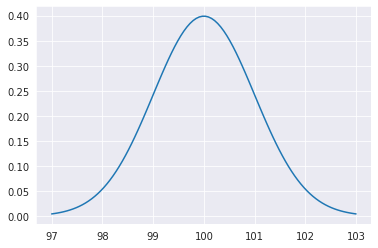

In [ ]:
#Plot Gaussian

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 100
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

gauss mean: 99.98, standard deviation: 0.09


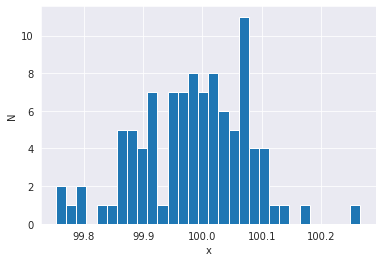

In [ ]:
mu, sigma = 100, 0.1 # mean and standard deviation
md['gauss'] = np.random.normal(mu, sigma, 100)
pl.hist(md['gauss'],bins=30)
pl.ylabel('N')
pl.xlabel('x')

print ("gauss mean: %.2f, standard deviation: %.2f"%(md['gauss'].mean(), md['gauss'].std()))

In [ ]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

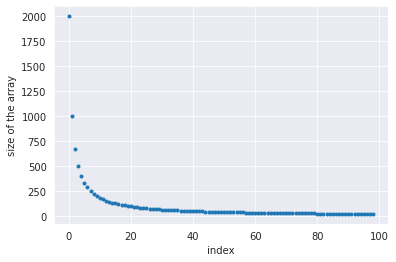

In [ ]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Text(1259.3999999999999, 100, 'expected mean')

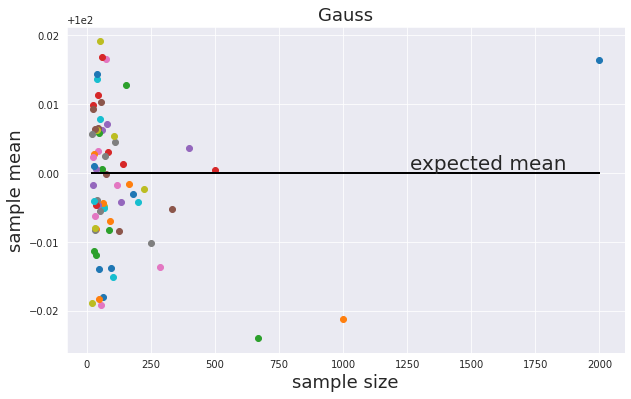

In [ ]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['gauss'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['gauss'][n] = np.random.normal(mu, sigma, 100)
    
# save the means for plotting later    

md['gauss']['means'] = {}
axgauss_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['gauss']:
    if not type(nn) == str:
        md['gauss']['means'][nn] = md['gauss'][nn].mean()
        #and plot it
        axgauss_mu_n.plot(nn, md['gauss']['means'][nn], 'o')
        axgauss_mu_n.set_xlabel('sample size', fontsize=18)
        axgauss_mu_n.set_ylabel('sample mean', fontsize=18)
        axgauss_mu_n.set_title('Gauss', fontsize=18)
        axgauss_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axgauss_mu_n.text(axgauss_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Text(0, 0.5, 'N')

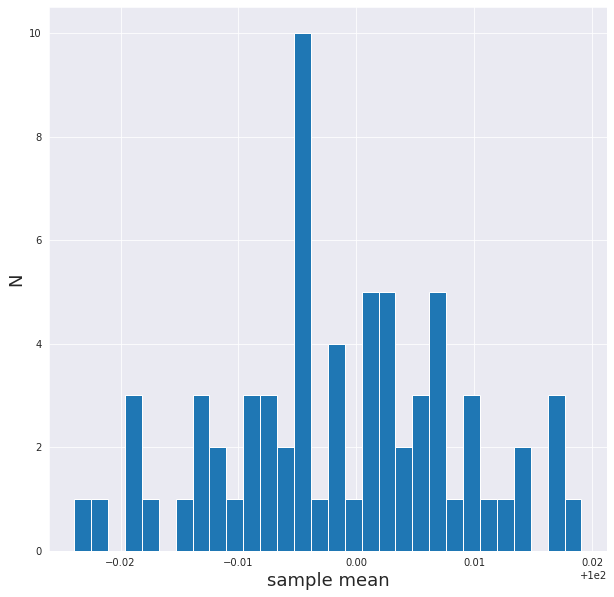

In [ ]:
allmeans = list(md['gauss']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

#**Poisson**

Poisson mean: 101.41, standard deviation: 9.27


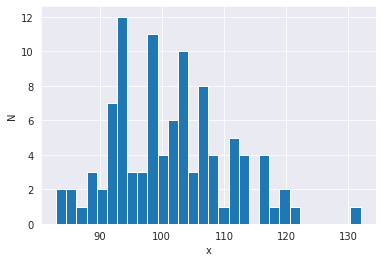

In [ ]:
mymean = 100
md['poisson'] = np.random.poisson(mymean, 100)
pl.hist(md['poisson'],bins=30)
pl.ylabel('N')
pl.xlabel('x')

print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['poisson'].mean(), md['poisson'].std()))


Text(1259.3999999999999, 100, 'expected mean')

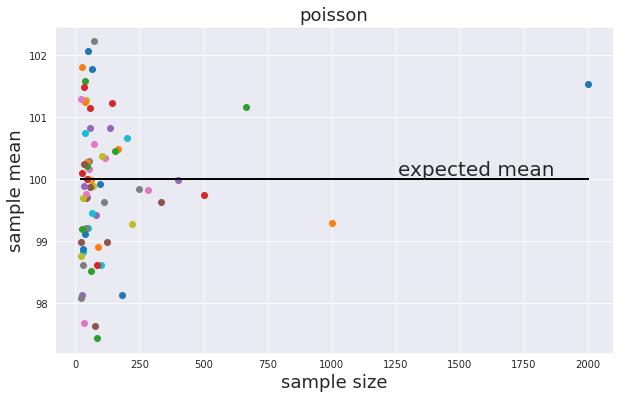

In [ ]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['poisson'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['poisson'][n] = np.random.poisson(mymean, 100)
    
# save the means for plotting later    

md['poisson']['means'] = {}
axpoisson_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        #and plot it
        axpoisson_mu_n.plot(nn, md['poisson']['means'][nn], 'o')
        axpoisson_mu_n.set_xlabel('sample size', fontsize=18)
        axpoisson_mu_n.set_ylabel('sample mean', fontsize=18)
        axpoisson_mu_n.set_title('poisson', fontsize=18)
        axpoisson_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axpoisson_mu_n.text(axpoisson_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Text(0, 0.5, 'N')

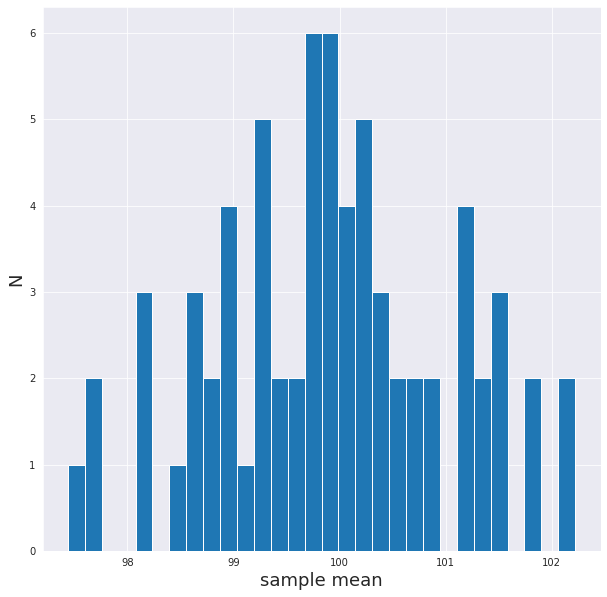

In [ ]:
allmeans = list(md['poisson']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

##**Binomial**

binomial mean: 5.02, standard deviation: 1.56


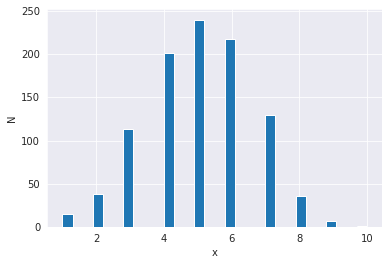

In [ ]:
mymean = 100

n, p = 10, .5  # number of trials, probability of each trial

md['binomial'] = np.random.binomial(n, p, 1000)
pl.hist(md['binomial'],bins=30)
pl.ylabel('N')
pl.xlabel('x')

print ("binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Text(1259.3999999999999, 100, 'expected mean')

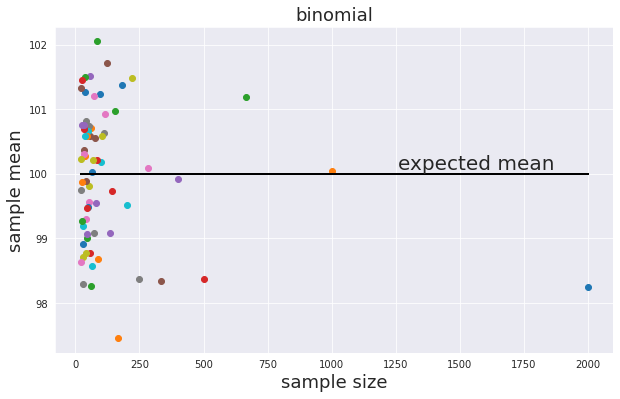

In [ ]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['binomial'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['binomial'][n] = np.random.poisson(mymean, 100)
    
# save the means for plotting later    

md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axbinomial_mu_n.text(axbinomial_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Text(0, 0.5, 'N')

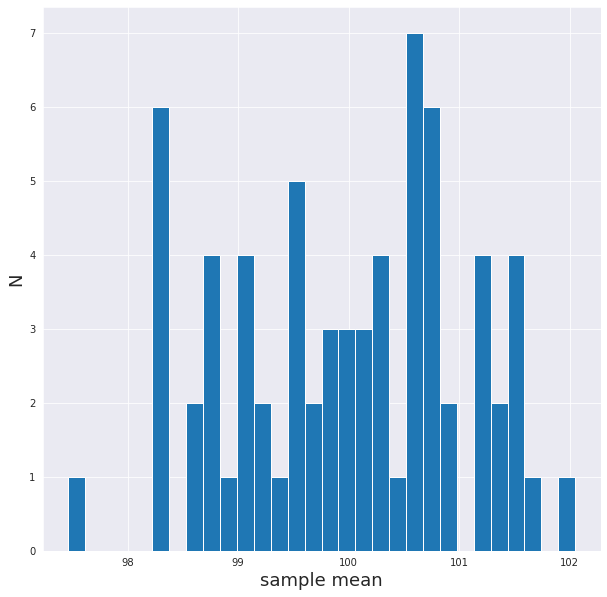

In [ ]:
allmeans = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)